# Surface concentrations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import netCDF4 as nc
import modules.mapping_functions as mf
import pandas as pd

%matplotlib inline

###### Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2015
results_folder1 = f'/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_euphotic/'

###### Load files:

In [3]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [4]:
ref   = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc',  'r')
lons_model  = np.array(ref.variables['nav_lon'])
lats_model  = np.array(ref.variables['nav_lat'])
depth_model = np.array(ref.variables['deptht'])

In [5]:
results1  = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
dissolmn1 = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1 = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [6]:
GEOTRACES_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = GEOTRACES_data['Station names'].dropna().astype('str')
lons      = GEOTRACES_data['station lon'].astype('float').dropna().values
lats      = GEOTRACES_data['Station lat'].astype('float').dropna().values

# Find indeces associated with station locations:
stn_i, stn_j = mf.find_indeces_vector(lons[5:], lats[5:], lons_model, lats_model)
stn_n        = stn_names[5:]

##### Functions:

In [8]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
    plot_var = np.mean(variable[month,3:17,:,:], axis=0)
#     plot_var = variable[month,layer,:,:]
#     plot_var = variable[month,:,:]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons_model, lats_model)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')
#     contour = proj1.contourf(x, y, plot_var, cmap=cmocean.cm.dense)


    cbar_ax = fig.add_axes([0.77, 0.25, 0.04, 0.5])
#     cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=[0,2,4,6,8,10,12,14])
    cbar    = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=7)
      
    if savefig:
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/R5-surface-fields-January.png', \
                       bbox_inches='tight', dpi=300)
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/R5-surface-fields-January.svg', \
                       bbox_inches='tight', dpi=300, format='svg')
    
    return

##### Figures of surface concentrations:

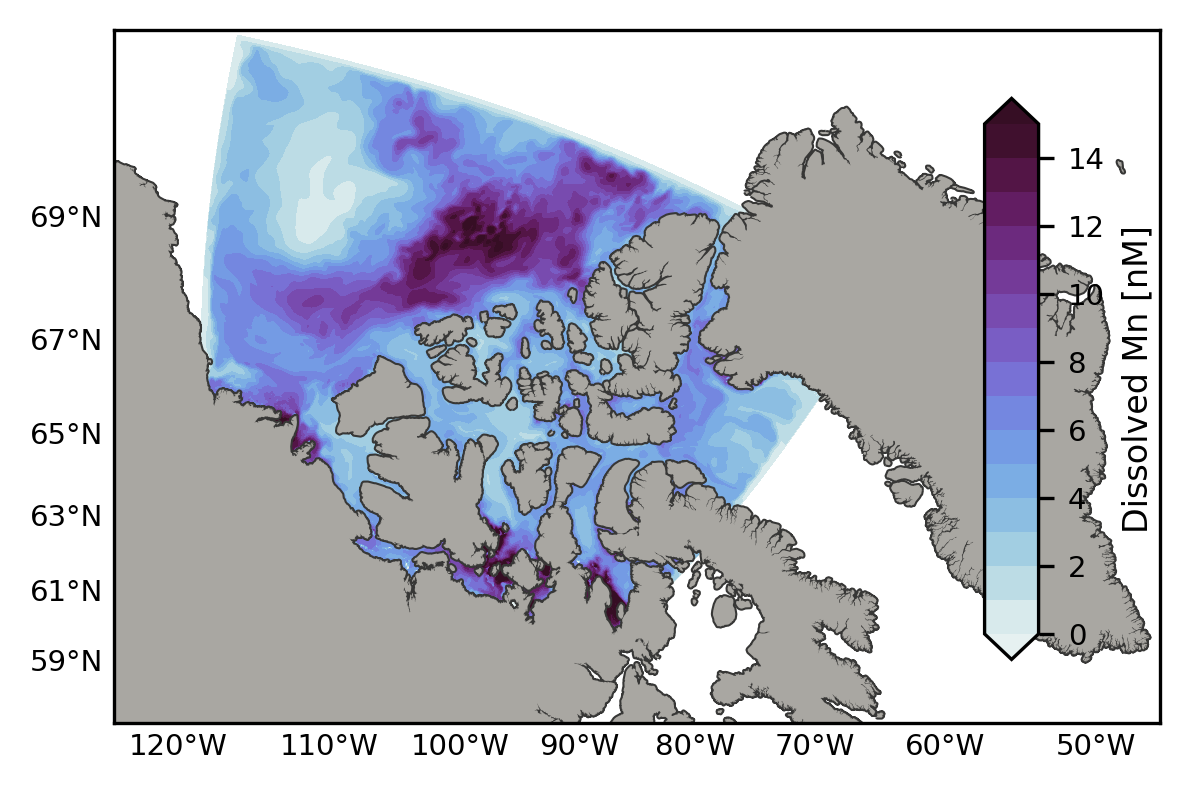

In [14]:
plot_layer(7,0,dissolmn1,vmin=0,vmax=15, savefig=True)

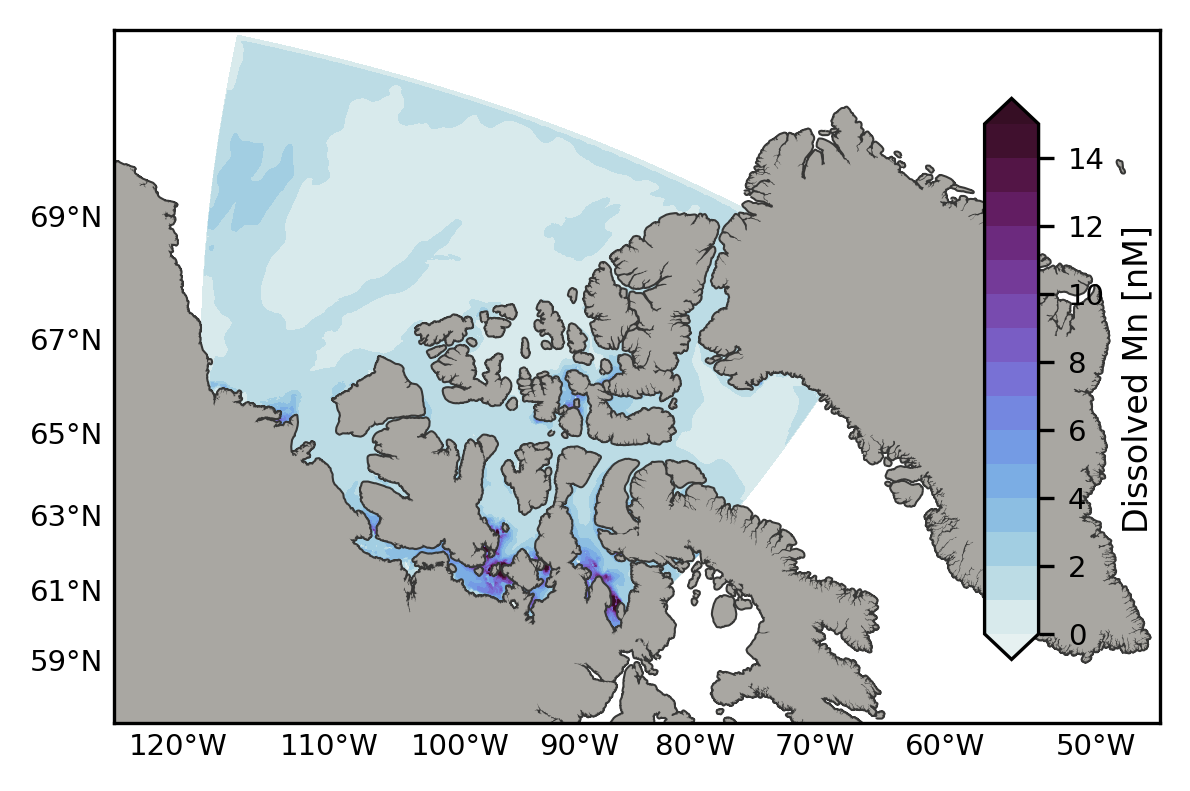

In [11]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=15, savefig=True)

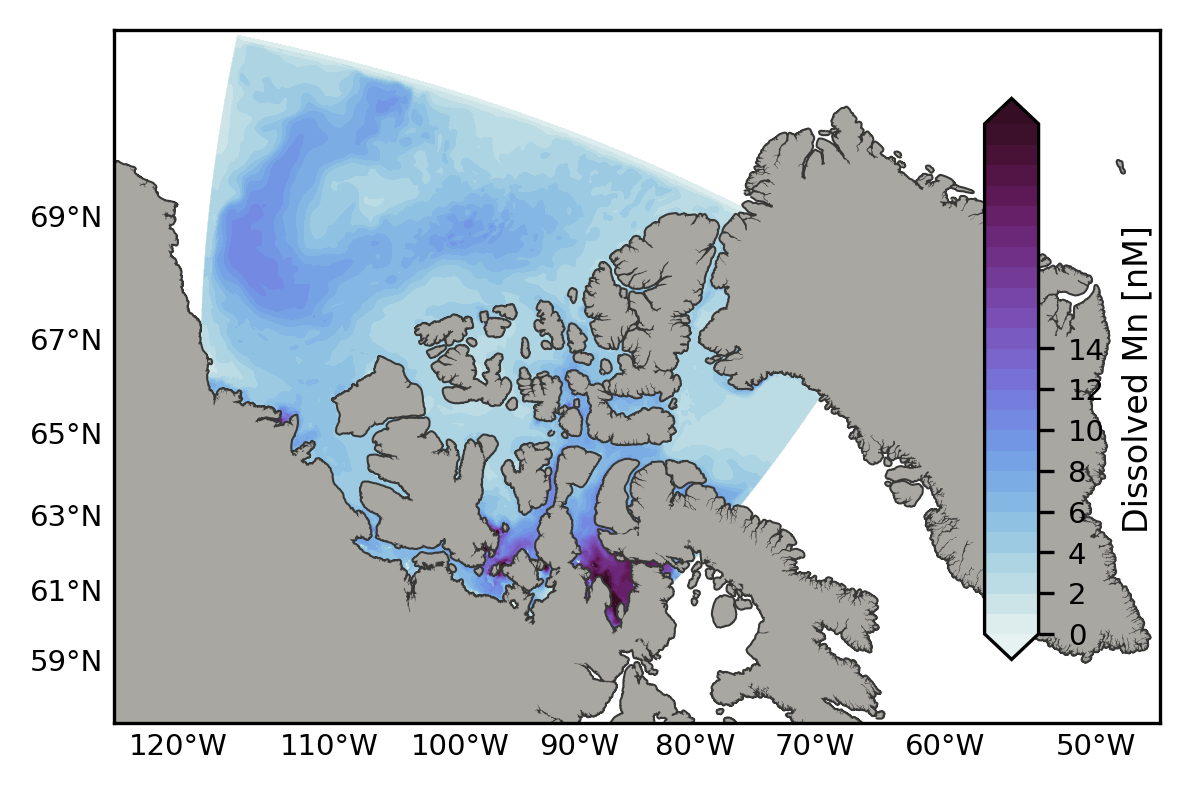

In [56]:
plot_layer(6,0,dissolmn1,vmin=0,vmax=25, savefig=False)